### regression analysis (BMI (INI21001) ~ GPR151)

In [1]:
library(data.table)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()


In [2]:
data_all <- fread(
    'zcat < ../../../private_data/FigS13-15_regression_data.tsv.gz', 
    header=TRUE,
    data.table=FALSE
)

Read 488370 rows and 53 (of 53) columns from 0.189 GB file in 00:00:04


In [18]:
data_all %>% group_by(GPR151) %>% summarise(n())

GPR151,n()
-9,313
0,480461
1,7560
2,36


In [3]:
repo_dir <- normalizePath('../../../')
out_dir <- file.path(repo_dir, 'figs', basename(getwd()))

In [4]:
data <- data_all %>% mutate(
    sex_label = ifelse(sex == 0, 'female', 'male'),
    x = GPR151,
    y = INI21001
) %>% filter(
    white_british == TRUE &
    sex != -9 &
    age > 0 & 
    x != -9 &
    y != -9    
)

y_lab <- 'BMI'
x_lab <- expression(paste("rs114285050 (", italic('GPR151'), ")"))
file_name_head <- 'GPR151_BMI'

data %>% dim() %>% print()

[1] 335937     56


#### the following snippents are semi-automated

In [5]:
p <- ggplot(
    data, 
    aes(x = as.factor(x), y = y, color=factor(x))) +
geom_boxplot(outlier.size = 0, outlier.stroke = 0) +
stat_summary(
    fun.y=mean, geom="errorbar", 
    aes(ymax = ..y.., ymin = ..y..),
    width = 1.1, linetype = "dashed"
) + 
labs(y = y_lab, x = x_lab) +
coord_cartesian(
    ylim=c(14,40)
) + 
facet_grid(sex_label ~ .)


Saving 7 x 7 in image


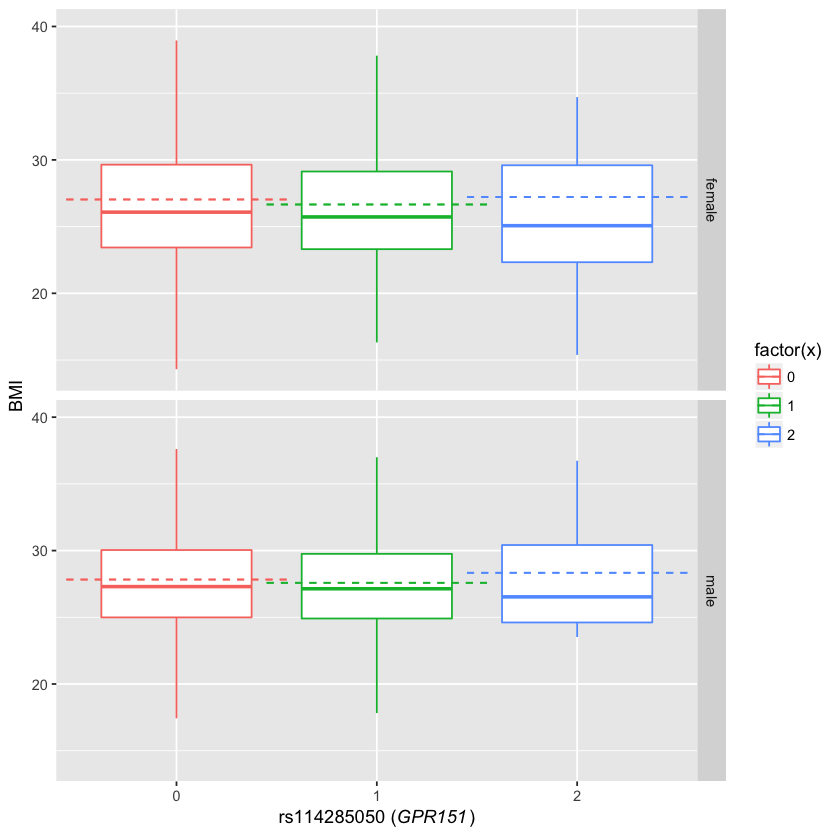

In [6]:
p  + 
ggsave(
    file.path(out_dir, paste0(file_name_head, '.pdf'))
)

In [7]:
aggregate(
    y ~ as.factor(x) + as.factor(sex_label), data, mean
) %>% print()

aggregate(
    y ~ as.factor(x) + as.factor(sex_label), data, median
) %>% print()

aggregate(
    y ~ as.factor(x) + as.factor(sex_label), data, length
) %>% print()


  as.factor(x) as.factor(sex_label)        y
1            0               female 27.03252
2            1               female 26.65725
3            2               female 27.21635
4            0                 male 27.82958
5            1                 male 27.58621
6            2                 male 28.33616
  as.factor(x) as.factor(sex_label)        y
1            0               female 26.08300
2            1               female 25.72365
3            2               female 25.06915
4            0                 male 27.30090
5            1                 male 27.13890
6            2                 male 26.53140
  as.factor(x) as.factor(sex_label)      y
1            0               female 177463
2            1               female   2948
3            2               female     16
4            0                 male 152910
5            1                 male   2588
6            2                 male     12


In [8]:
lm_1 <- lm (
    y ~ 0 + age + as.factor(sex) + PC1 + PC2 + PC3 + PC4 + as.factor(x),
    data
)


In [9]:
summary(lm_1)


Call:
lm(formula = y ~ 0 + age + as.factor(sex) + PC1 + PC2 + PC3 + 
    PC4 + as.factor(x), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.267  -3.229  -0.737   2.384  47.804 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
age              0.025967   0.001019  25.483  < 2e-16 ***
as.factor(sex)0 25.233285   0.093881 268.779  < 2e-16 ***
as.factor(sex)1 26.022099   0.094333 275.852  < 2e-16 ***
PC1             -0.004745   0.005317  -0.892    0.372    
PC2             -0.005850   0.005501  -1.063    0.288    
PC3              0.003885   0.005286   0.735    0.462    
PC4              0.049093   0.002915  16.843  < 2e-16 ***
as.factor(x)1   -0.324009   0.063995  -5.063 4.13e-07 ***
as.factor(x)2    0.386277   0.892425   0.433    0.665    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.722 on 335928 degrees of freedom
Multiple R-squared:  0.9712,	Adjusted R-squared:  0.9712 
F-statistic: 1.257

In [10]:
lm_age2 <- lm (
    y ~ 0 + age + I(age^2) + as.factor(sex) + PC1 + PC2 + PC3 + PC4 + as.factor(x),
    data
)


In [11]:
summary(lm_age2)


Call:
lm(formula = y ~ 0 + age + I(age^2) + as.factor(sex) + PC1 + 
    PC2 + PC3 + PC4 + as.factor(x), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.120  -3.225  -0.734   2.386  47.941 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
age              0.3037280  0.0168492  18.026  < 2e-16 ***
I(age^2)        -0.0021588  0.0001307 -16.515  < 2e-16 ***
as.factor(sex)0 16.4388699  0.5407073  30.403  < 2e-16 ***
as.factor(sex)1 17.2368558  0.5402391  31.906  < 2e-16 ***
PC1             -0.0046344  0.0053151  -0.872    0.383    
PC2             -0.0059580  0.0054988  -1.083    0.279    
PC3              0.0039292  0.0052843   0.744    0.457    
PC4              0.0494138  0.0029137  16.959  < 2e-16 ***
as.factor(x)1   -0.3216279  0.0639695  -5.028 4.96e-07 ***
as.factor(x)2    0.3707919  0.8920647   0.416    0.678    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.72 on 335927 degrees of freed